<a href="https://colab.research.google.com/github/zhousanfu/Tensorflow_Demo/blob/master/tensorflow_%E9%80%BB%E8%BE%91%E5%9B%9E%E5%BD%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
gpus = tf.config.list_physical_devices("GPU")
if gpus:
    tf.config.experimental.set_memory_growth(gpus[0], True)  #设置GPU显存用量按需使用
    tf.config.set_visible_devices([gpus[0]],"GPU")
print('tensorflow version {}'.format(tf.__version__))

tensorflow version 2.7.0


In [4]:
data = pd.read_csv('../data/credit-a.csv', header=None)
data.head()

data.iloc[:,-1].value_counts()

x = data.iloc[:, :-1]
y = data.iloc[:, -1].replace(-1, 0)

In [6]:
tf.keras.backend.clear_session()

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4, input_shape=(15,), activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 64        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc']
              )

history = model.fit(x, y, epochs=100)

2023-03-02 09:37:36.517126: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/100
1/1 [==============================] - 0s 299ms/step - loss: nan - acc: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: nan - acc: 0.3333
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: nan - acc: 0.3333
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: nan - acc: 0.3333
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: nan - acc: 0.3333
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: nan - acc: 0.3333
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: nan - acc: 0.3333
Epoch 8/100
1/1 [==============================] - 0s 1ms/step - loss: nan - acc: 0.3333
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: nan - acc: 0.3333
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: nan - acc: 0.3333
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - loss: nan - acc: 0.3333
Epoch 12/100


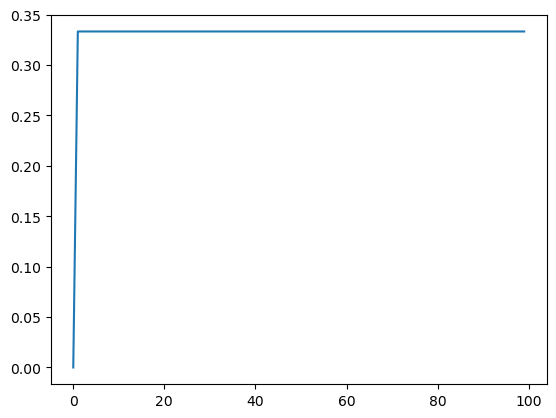

In [8]:
history.history.keys()
plt.plot(history.epoch, history.history.get('acc'))